In [276]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.ndimage import laplace
import time
from scipy.signal import find_peaks
%matplotlib tk

# MVP EXAM
## All code available to run in question order below the class in the next cell.
## Figures attached are snapshots of type field animation, figa D1 is for question b with D=1,q=1,p=0.5.
## partdD=0 is for part d). with D=0.5, q=1, p= 2.5

In [312]:
class IVP():
    
    def __init__(self, val, case):
        """
        initialise grids for a, b, c
        constants input as array of [D,q,p]
        """
        self.I = val
        #self.rand = 
        self.agrid = 0.33*(np.random.rand(*(np.ones((50*np.ones(self.I[-1], dtype=int)))).shape))
        self.bgrid = 0.33*(np.random.rand(*(np.ones((50*np.ones(self.I[-1], dtype=int)))).shape))
        self.cgrid = 0.33*(np.random.rand(*(np.ones((50*np.ones(self.I[-1], dtype=int)))).shape))
        #self.grid2 = self.grid
        #self.p = np.zeros_like(self.grid)
        self.N = 50
        
        if case == "cahn":
            self.a = val[3]
            self.M = val[1]
            self.k = val[2]
            
        if case == "exam":
            self.D = val[1]
            self.q = val[2]
            self.p = val[3]
            self.dt = 0.05
            self.dx = 1
            
        
        
    def cahnhilliard(self,dt=1,dx=1):
        """
        euler update for cahn hilliard
        """
        phi, M, k, a, n = self.I
        copy = np.copy(self.grid)
        mu = -self.a*copy+self.a*copy**3-self.k*(dt/dx**2)*(np.roll(copy,1,axis=0)
            + np.roll(copy,-1,axis=0) + np.roll(copy,1,axis=1) + np.roll(copy,-1,axis=1)
            -(4*copy))
        self.grid = self.grid + M*(dt/dx**2)*(np.roll(mu,1,axis=0)+np.roll(mu,-1,axis=0)+np.roll(mu,1,axis=1)+np.roll(mu,-1,axis=1)-(4*mu))
    
    def laplace(self, grid):
        copy = np.copy(grid)
        laplace = (1/(self.dx**2))*(np.roll(copy,1,axis=0)
            + np.roll(copy,-1,axis=0) + np.roll(copy,1,axis=1) + np.roll(copy,-1,axis=1)
            -(4*copy))
        return laplace
    
    def aupdate(self):
        
        copya = np.copy(self.agrid)
        copyb = np.copy(self.bgrid)
        copyc = np.copy(self.cgrid)

        self.agrid = self.agrid + self.dt*(self.D * self.laplace(copya)  + self.q*self.agrid*(1 - copya - copyb - copyc) - self.p*copya*copyc)
        
    def bupdate(self):
        
        copya = np.copy(self.agrid)
        copyb = np.copy(self.bgrid)
        copyc = np.copy(self.cgrid)

        self.bgrid = self.bgrid + self.dt*(self.D * self.laplace(copyb)  + self.q*self.bgrid*(1 - copya - copyb - copyc) - self.p*copya*copyb)
        
    def cupdate(self):
        
        copya = np.copy(self.agrid)
        copyb = np.copy(self.bgrid)
        copyc = np.copy(self.cgrid)

        self.cgrid = self.cgrid + self.dt*(self.D * self.laplace(copyc)  + self.q*self.cgrid*(1 - copya - copyb - copyc) - self.p*copyc*copyb)
   
    
   
    def typefield(self):
        N = self.N
        typearr = np.ones_like(self.agrid)
        for i in range(N):
            for j in range(N):
                sub = (1-self.agrid - self.bgrid - self.cgrid)
                arr = np.array([sub[i,j], self.agrid[i,j], self.bgrid[i,j],self.cgrid[i,j]])
                index = np.where(arr == np.amax(arr))
                typearr[i,j] = index[0][0]
                
        return typearr
               
                    
                    
                
    def newcycle(self,n=5000):
        """
        animation of typfield
        """
        nrange = np.arange(0,n,1)
        
        for i in range(n):
            self.aupdate()
            self.bupdate()
            self.cupdate()
            #self.typefield()
           
            if i%10 ==0:
                tfield = self.typefield()
                cmap = colors.ListedColormap(['red','green','blue','gray'])
                plt.cla()
                im = plt.imshow(tfield, animated=True, origin='lower')
                plt.draw()
                plt.pause(0.001)
                
           
            if i%50000 == 0:
                print(i)
                
                
    def plotfraction(self, n=8000):
        
        """
        plot fraction of values
        """
        
        nrange = np.arange(0,n,1)
        a = []
        b = []
        c = []
        t = []
        for i in range(n):
            self.aupdate()
            self.bupdate()
            self.cupdate()
            
            if i%10 ==0:
                tfield = self.typefield()
                t.append(i)
                a.append((tfield==1).sum())
                b.append((tfield==2).sum())
                c.append((tfield==3).sum())
                
                
        return t, a, b, c   
    
    def absorb(self, n=20000):
        
        nrange = np.arange(0,n,1)
        a = []
        b = []
        c = []
        t = []
        for i in range(n):
            self.aupdate()
            self.bupdate()
            self.cupdate()
            
            if i%10 ==0:
                tfield = self.typefield()
                t.append(i)
                tfracs = np.array([(tfield==1).sum(), (tfield==2).sum(), (tfield==3).sum()])/2500
                #print(tfracs)
                if any(val == 1 for val in tfracs):
                    print('absorbed')
                    print(i)
                    return i
                    
                
                
    def aplot(self, n=20000):
        
        """
        picked two arbitrary a grid values, plot them over time
        """
        a1 = []
        a2 = []
        nrange = np.arange(0,n,1)
        
        for i in range(n):
            self.aupdate()
            self.bupdate()
            self.cupdate()
            a1.append(self.agrid[4,28])
            a2.append(self.agrid[34,22])
            
        return a1, a2, nrange
    
    def distance(self, n=100):
        
        """
        calculate distance to mid point of row, records whether cells have same tuype
        """
        
        nrange = np.arange(0,n,1)
        distance = np.arange(0,int(self.N/2),1)
        number = np.zeros_like(distance)
        for i in range(n):
            self.aupdate()
            self.bupdate()
            self.cupdate()
            if i%10 ==0:
                tfield = self.typefield()
                for row in tfield:
                
                    prime = row[int(self.N/2)]
                    ticks = np.where(row == prime)
                    for i in ticks[0]:
                        index = abs((25-i))%self.N
                        #print(i, index)
                        number[index-1] += 0.5
                        print(number[index-1] + 0.5) 
                        #print(number[index-1])
                        
                        
        return number/n, distance
                    
                    
        
        
        
        
        
        
        
        
                
                
    
            
                    
                
                
            
        
        
        
        
        
                
        
    
    
                
    
        
        
            
    
        
        

In [280]:
chem = IVP([0,1,1,0.5,2], case='exam')

## Question a).

In [ ]:
%matplotlib tk
chem.newcycle()

## Question b).

In [ ]:
questionb = IVP([0,1,1,0.5,2], case='exam')

In [281]:
t,a,b,c = questionb.plotfraction()
a = np.array(a)/2500
a = np.array(b)/2500
a = np.array(c)/2500

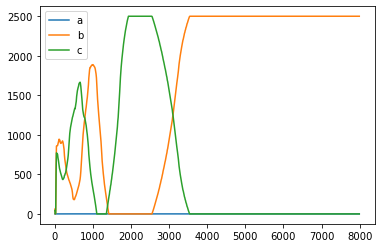

In [282]:
%matplotlib inline
plt.plot(t,a, label = 'a')
plt.plot(t,b, label = 'b')
plt.plot(t,c, label = 'c')
plt.legend()

# Oscillations between the parameters can be seen before one dies out and the oscillations become less frequent. The another dies and the state has reached absorbing status

In [ ]:
ts = []
for i in range(10):
    absorb = IVP([0,1,1,0.5,2], case='exam')
    ts.append(absorb.absorb())
    

In [191]:
mean = np.mean(np.array(ts))
err = (np.std(np.array(ts)))/np.sqrt(len(ts))
print(mean,err)

2476.0 391.43122001189425


### The mean time to absorbption is 2476, and the standard error in the mean is 391.43

# Question d.)

In [283]:
newparam = IVP([0,0.5,1,2.5,2], case='exam')

In [ ]:
%matplotlib tk
newparam.newcycle()

Significantly higher competition between the chemical species, more around at any given time, greater coexistence. 

# Question e.)

In [286]:
aosc = IVP([0,0.5,1,2.5,2], case='exam')
a1,a2, t = aosc.aplot()

period = 648.1111111111111


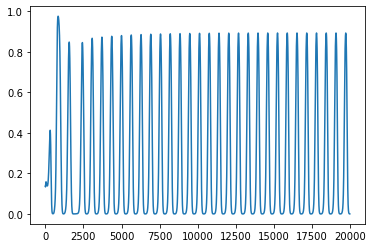

In [287]:
%matplotlib inline
plt.plot(t,a1)
peaks1 = find_peaks(a1[2500:])
print("period = " + str((t[-1]-2500)/len(peaks[0])))

period = 648.1111111111111


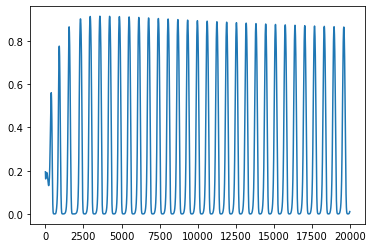

In [288]:
plt.plot(t,a2)
peaks2 = find_peaks(a2[2500:])
print("period = " + str((t[-1]-2500)/len(peaks[0])))

### The periods are the same if you look at t>2500 to get rid of the initial variability, even without that they're quite close to each other.

## Question f).

### Not sure if this question wants probability at any given time within simulation, or probability over simulations at selected time. Went with the first idea

In [313]:
f = IVP([0,0.5,1,2.5,2], case='exam')

In [ ]:
prob , dist = f.distance()
print(prob)

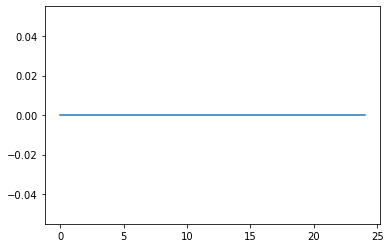

In [300]:
plt.plot(dist,prob)